In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf


In [161]:
#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics


# Importing the dataset

In [162]:
df_full = pdr.get_data_yahoo("AAPL", start="2018-01-01").reset_index()

#edit your path here
df_full.to_csv('D:/Siraj/Finance_Week/Output/AAPL.csv',index=False)


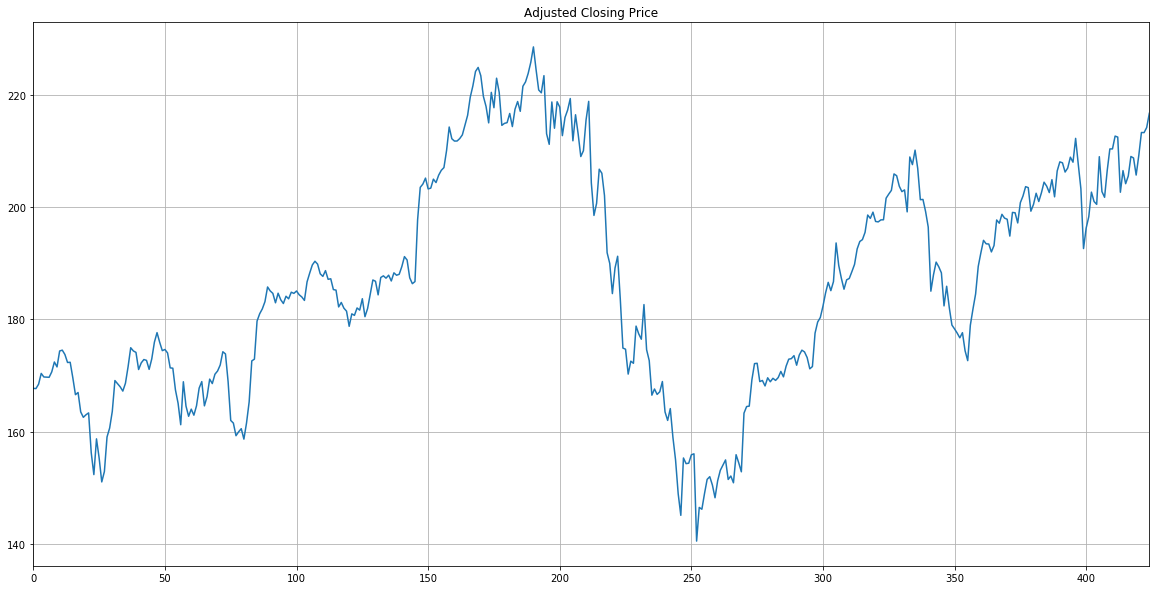

In [163]:
df_full["Adj Close"].plot(label="AAPL",figsize=(20,10),title="Adjusted Closing Price",grid=True)

In [164]:
df_full.set_index("Date", inplace=True)


In [165]:
df_full.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,167.701889
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,167.672668
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,168.451508
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,170.369385
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,169.736588


In [166]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [167]:
y.shape

(393,)

In [168]:
df_full['Adj Close']

Date
2018-01-02    167.701889
2018-01-03    167.672668
2018-01-04    168.451508
2018-01-05    170.369385
2018-01-08    169.736588
                 ...    
2019-09-04    209.190002
2019-09-05    213.279999
2019-09-06    213.259995
2019-09-09    214.169998
2019-09-10    216.699997
Name: Adj Close, Length: 425, dtype: float64

# Splitting into Training and Testing Data 

In [169]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [170]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

# Functions to Calculate Metric and Plot

In [171]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

# Model 1 - Linear Regression

In [172]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
y_pred_lr=model_lr.predict(x_test)

Mean Absolute Error: 2.8877
Mean Squared Error: 13.0447
Root Mean Squared Error: 3.6117


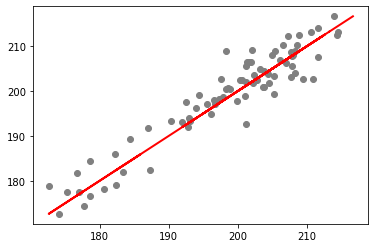

In [174]:
get_performance(y_pred_lr)
get_plot(y_pred_lr)

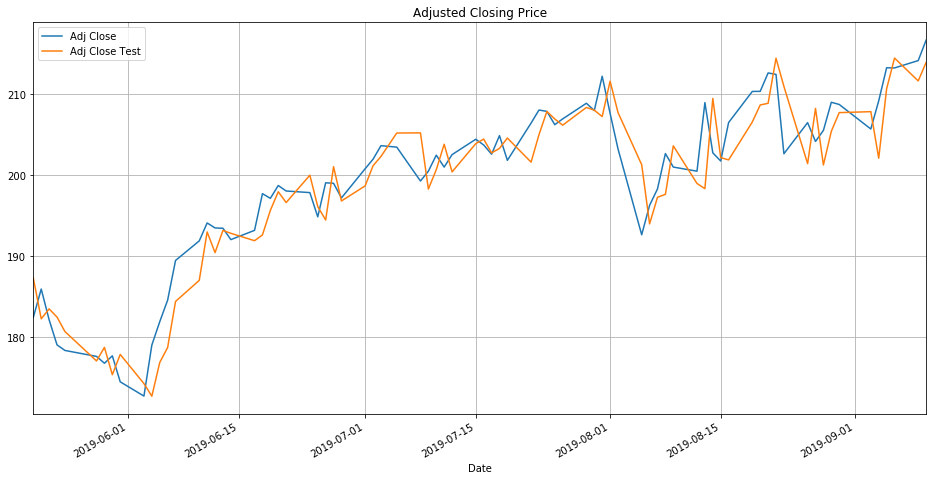

In [175]:
# Comparing prediction with test data
df_lr = df_full.copy()
df_lr.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lr = df_lr.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_lr['Adj Close Test'] = y_pred_lr
df_lr.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Model 2 - Ridge Regression


In [176]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

Mean Absolute Error: 2.8875
Mean Squared Error: 13.0426
Root Mean Squared Error: 3.6115


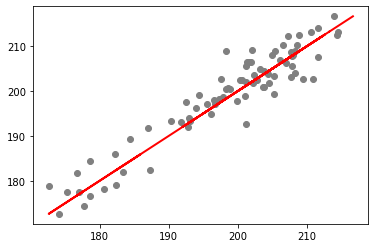

In [177]:
get_performance(y_pred_ridge)
get_plot(y_pred_ridge)

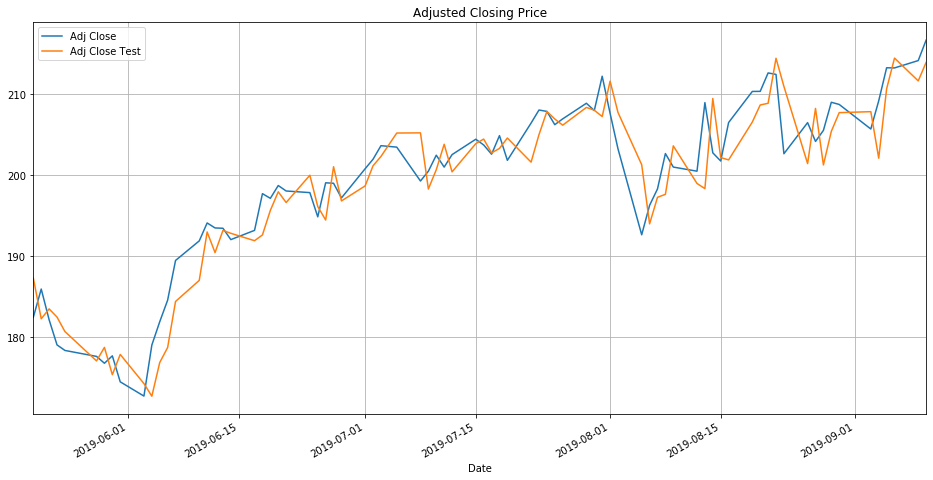

In [178]:
# Comparing prediction with test data 
df_ridge = df_full.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Model 3 - Gradient Boosting Trees


In [179]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

Mean Absolute Error: 3.3805
Mean Squared Error: 16.4067
Root Mean Squared Error: 4.0505


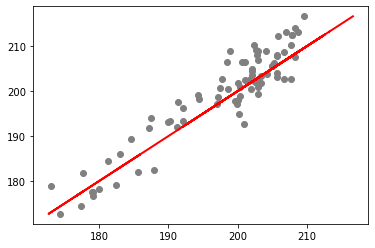

In [180]:
get_performance(y_pred_gb)
get_plot(y_pred_gb)

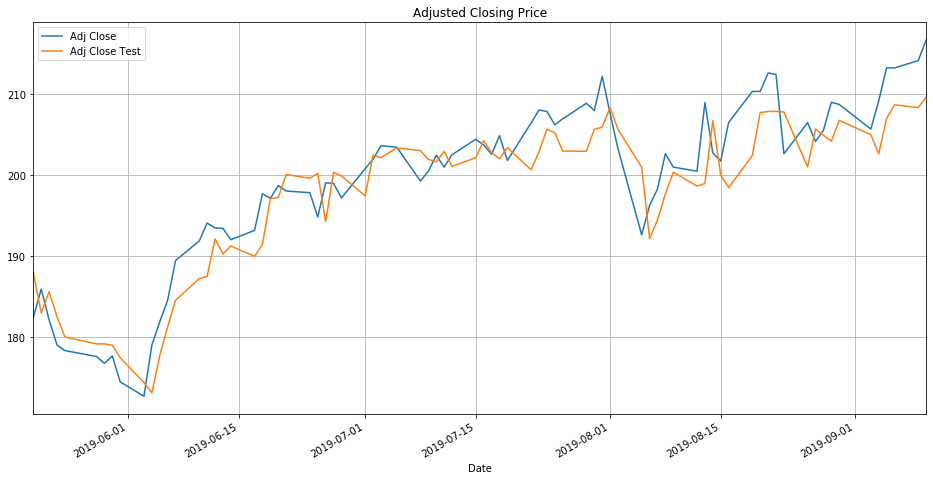

In [181]:
# Comparing prediction with test data
df_gb = df_full.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Model 4 - Random Forest

In [182]:
from sklearn.ensemble import RandomForestRegressor


In [183]:
#Create and Train the RandomForestRegressor Model
rf=RandomForestRegressor(n_estimators=200,random_state=101)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

Mean Absolute Error: 3.2669
Mean Squared Error: 15.73
Root Mean Squared Error: 3.9661


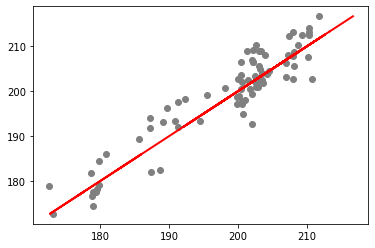

In [184]:
get_plot(y_pred_rf)
get_performance(y_pred_rf)

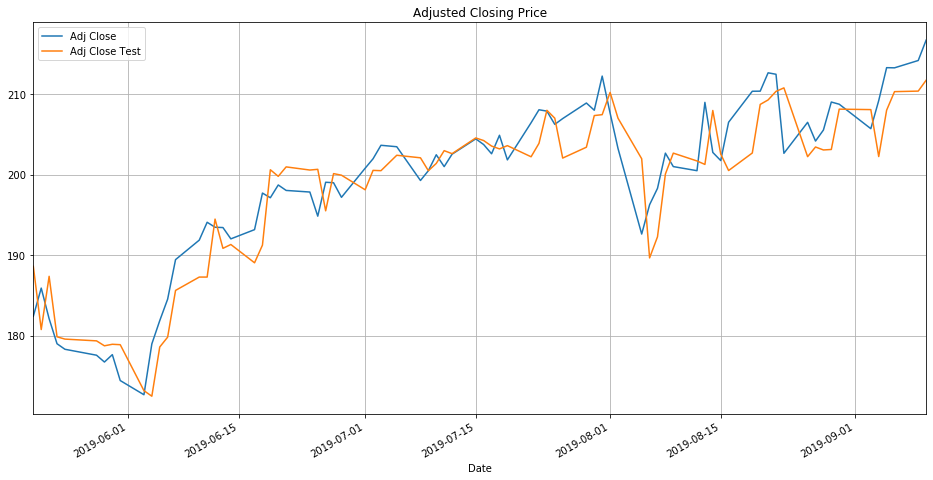

In [185]:
# Same for the test
df_rf = df_full.copy()
df_rf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_rf = df_rf.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_rf['Adj Close Test'] = y_pred_rf
df_rf.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Model 5 - Lasso Regression

In [186]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)

#generate predictions
y_pred_lasso=model_lasso.predict(x_test)

Mean Absolute Error: 2.7137
Mean Squared Error: 12.0296
Root Mean Squared Error: 3.4684


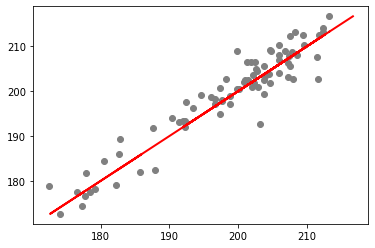

In [187]:
get_performance(y_pred_lasso)
get_plot(y_pred_lasso)


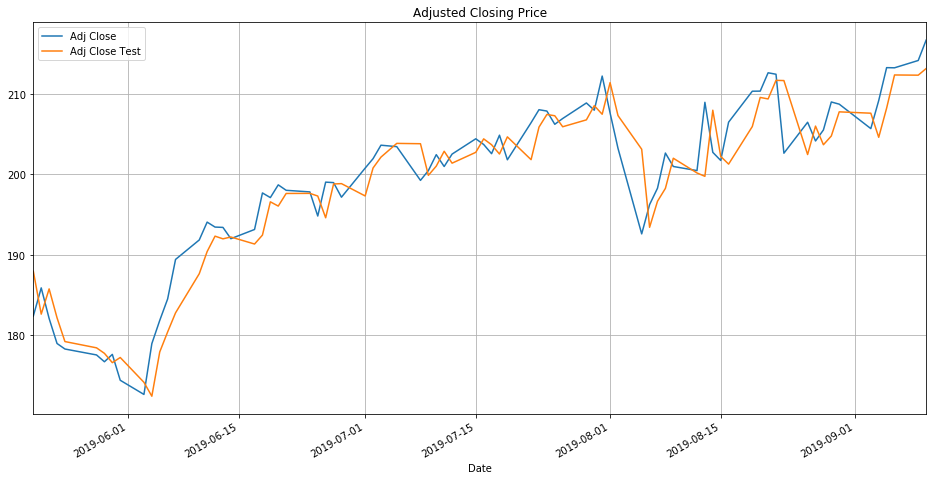

In [188]:
# Same for the test
df_lasso = df_full.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_lasso['Adj Close Test'] = y_pred_lasso
df_lasso.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Comparing 5 Models



In [189]:
df_comp=pd.DataFrame({"lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb),
                      "rf":np.absolute(y_test-y_pred_rf),"lasso":np.absolute(y_test-y_pred_lasso)})

(0, 10)

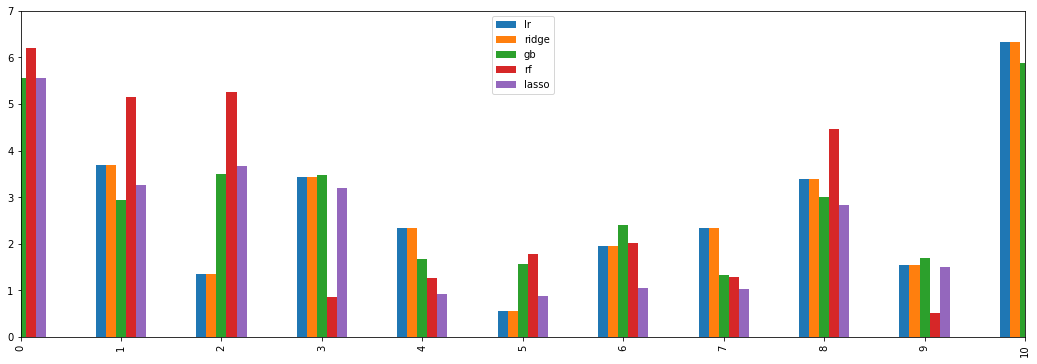

In [196]:
df_comp.plot.bar(figsize=(18, 6))
plt.ylim(0,7)
plt.xlim(0,10)

In [191]:
print("linear regression confidence : ",(model_lr.score(x_test,y_test)*100))
print("ridge regression confidence: ",(model_ridge.score(x_test,y_test)*100))
print("gradient boost trees confidence : ",(model_gb.score(x_test,y_test)*100))
print("random forest confidence : ",(rf.score(x_test,y_test)*100))
print("lasso regression confidence : ",(model_lasso.score(x_test,y_test)*100))

linear regression confidence :  88.28028114013439
ridge regression confidence:  88.28216327011155
gradient boost trees confidence :  85.25972344570617
random forest confidence :  85.8676847916253
lasso regression confidence :  89.1922456025916
